# Business Problem
A business manager of a consumer credit card bank is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off. They also want to predict customer churn from the dataset and gain some insights on how the bank can reduce the customers who have churned.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Loading the Dataset

In [ ]:
#import data 

import pandas as pd
bank = pd.read_csv('/content/drive/MyDrive/credit_card_churn.csv')

In [ ]:
bank.shape

(10127, 23)

# Data Cleaning

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# drop unneeded columns

bank = bank.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
                 ,"CLIENTNUM"],
                axis=1)

In [ ]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
bank.info()

In [ ]:
#checking null values

bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
#check data duoplication
bank.duplicated().sum()
bank.drop_duplicates(inplace=True)
bank.shape

(10127, 20)

# Exploratorv Data Analysis and Data Visualization

In [ ]:
bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Customer age distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Credit Card Customer Age Distribution')

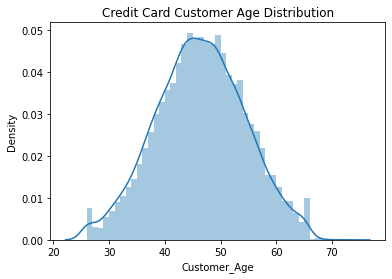

In [ ]:
sns.distplot(bank['Customer_Age'])
plt.title('Credit Card Customer Age Distribution')

* Customer age is normally distributed. 
* Most of the customer age are clustered around the mean value (between 40 to 60).

In [ ]:
bank["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


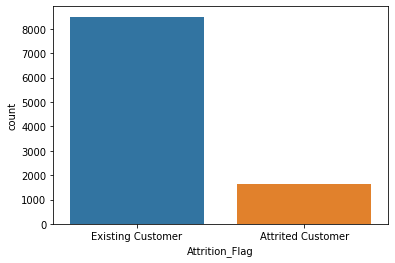

In [ ]:
# data is severly imbalanced so we will apply SMOTE to balance it

sns.countplot("Attrition_Flag",data=bank)

### Proportion of Gender

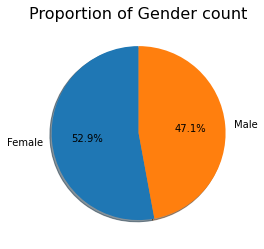

In [ ]:
plt.pie(bank['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()

### Proportion of existing and attrited customers count

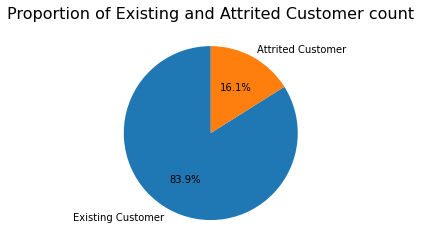

In [ ]:
plt.pie(bank['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

### Proportion of existing and attrited customer by gender

Text(0.5, 1.0, 'Existing and Attrted Customers by Gender')

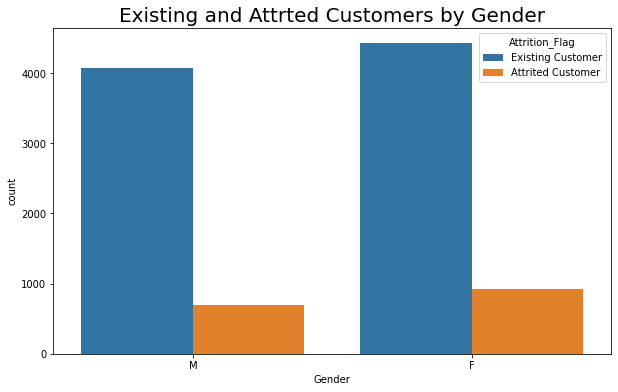

In [ ]:
#visualize to see the number of existing and attrited customers by gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=bank)
plt.title('Existing and Attrted Customers by Gender', fontsize=20)

Text(0.5, 1.0, 'Existing Customer vs Gender')

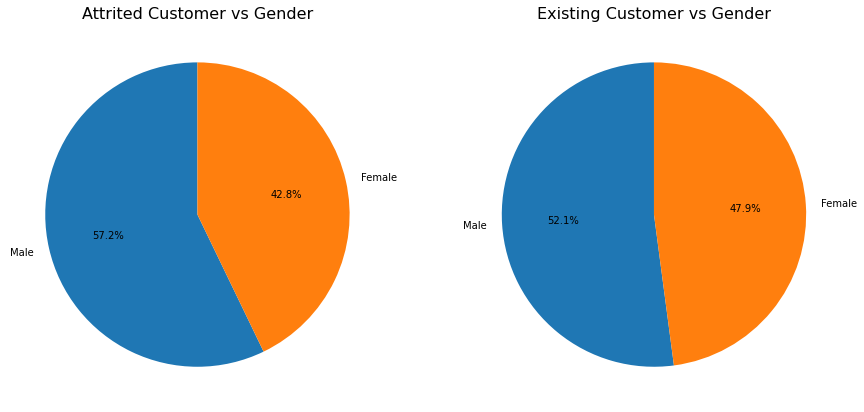

In [ ]:
# visualize to see the proportion of existing and attrited customers by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_gender = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
ax1.pie(x=attrited_gender, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Gender', fontsize=16)

existing_gender=bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
ax2.pie(x=existing_gender,labels=["Male","Female"],autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Gender', fontsize=16)

### Proportion of entire education levels

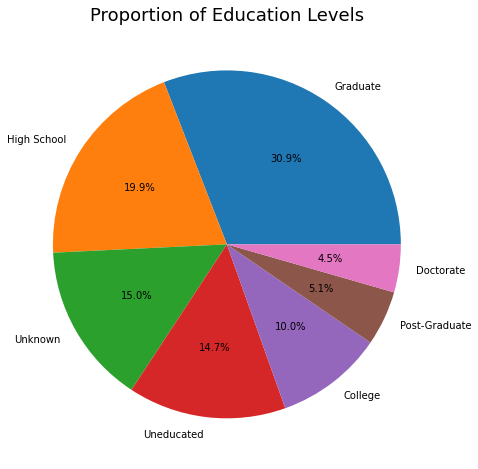

In [ ]:
edu = bank['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Proportion of Education Levels', fontsize = 18)
plt.show()

### Proportion of education level by existing and attrited customer

Text(0.5, 1.0, 'Existing Customer vs Education Level')

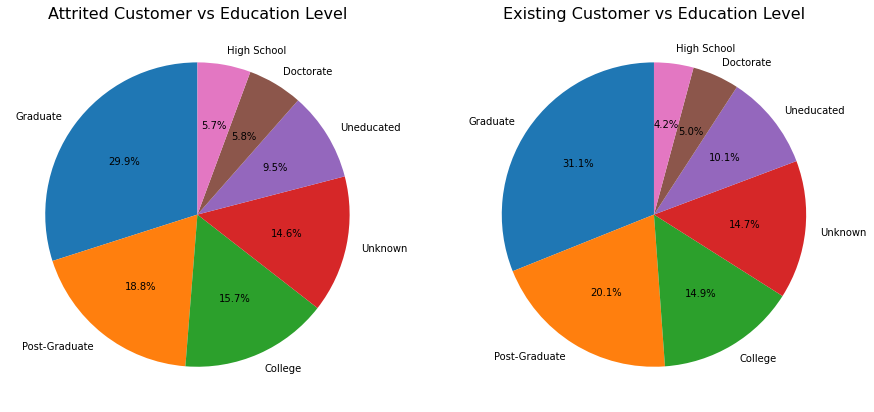

In [ ]:
# Proportion of education level by gender

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_edu = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Education Level', fontsize=16)

existing_edu = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_edu, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Education Level', fontsize=16)


### Proportion of education level by gender

Text(0.5, 1.0, 'Male vs Education Level')

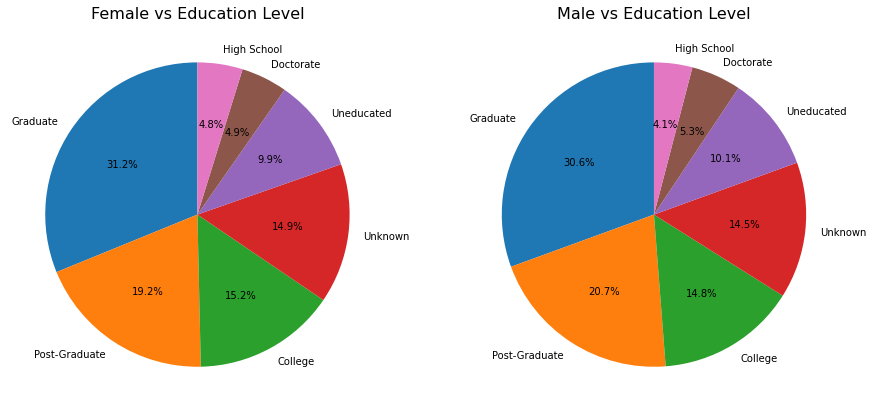

In [ ]:
# By pieplot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_eduprop = bank.loc[bank["Gender"] == "F", ["Education_Level"]].value_counts().tolist()
ax1.pie(x=attrited_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Female vs Education Level', fontsize=16)

existing_eduprop = bank.loc[bank["Gender"] == "M", ["Education_Level"]].value_counts().tolist()
ax2.pie(x=existing_eduprop, labels=['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated',
                                     'Doctorate', 'High School'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Male vs Education Level', fontsize=16)



Text(0.5, 1.0, 'Education Level by gender')

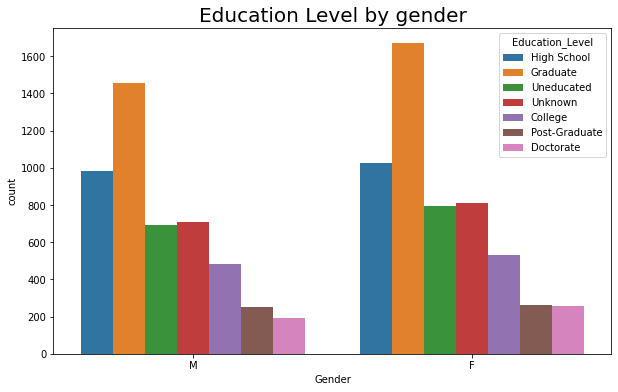

In [ ]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Education_Level', data=bank)
plt.title('Education Level by gender', fontsize=20)

### Proportion of marital status by attrited and existing customers



In [ ]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
# Proportion of marital status by customer

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_mar = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts().tolist()
ax1.pie(x=attrited_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Marital_Status', fontsize=16)

existing_mar = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Marital_Status"]].value_counts().tolist()
ax2.pie(x=existing_mar, labels=['Married', 'Single', 'Unknown', 'Divorced'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Marital_Status', fontsize=16)


In [ ]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=bank)
plt.title('Attrited and Existing Customers by Marital Status', fontsize=20)

### Proportion of income category by customer

In [ ]:
# Proportion of income category by customer

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))
#count = Counter(bank['Income_Category'])

attrited_inc = bank.loc[bank["Attrition_Flag"] == "Attrited Customer", ["Income_Category"]].value_counts().tolist()
ax1.pie(x=attrited_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Income_Category', fontsize=16)

existing_inc = bank.loc[bank["Attrition_Flag"] == "Existing Customer", ["Income_Category"]].value_counts().tolist()
ax2.pie(x=existing_inc, labels=count, autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Income_Category', fontsize=16)


In [ ]:
#exploring Income category column

bank["Income_Category"].value_counts()

In [ ]:
#EDA for Income category

plt.figure(figsize=(10,5))
sns.countplot("Income_Category",hue="Attrition_Flag",data=bank)

In [ ]:
#replace Attrition_Flag to numerical values

bank["Attrition_Flag"].replace(to_replace = ["Existing Customer","Attrited Customer"],value=[1,0],inplace=True)

In [ ]:
bank["Attrition_Flag"].value_counts()

In [ ]:
bank.columns

In [ ]:
# onehot encoding for categorical columns

bank = pd.get_dummies(data=bank,columns=["Gender","Education_Level","Marital_Status","Income_Category",
                                         "Card_Category"]
                      ,drop_first=True)

In [ ]:
#heatmap for correlation 

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (12,6))

sns.heatmap(bank.corr(),annot = True)

In [ ]:
#checking correlation of attrition_flag with other fields
plt.figure(figsize=(15,5))
bank.corr()["Attrition_Flag"].sort_values().plot(kind="bar")

In [ ]:
# divide into features and labels

X = bank.drop("Attrition_Flag",axis=1)

In [ ]:
X.shape

In [ ]:
y= bank["Attrition_Flag"]

In [ ]:
y.shape

# Customer Churn Prediction

In [ ]:
# do train test split for features and labels

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

NameError: ignored

In [ ]:
# checking training sample numbers for Label ( attrition flag)
from collections import Counter
print(Counter(y_train))

In [ ]:
# perform Standard Scaling and SMOTE to handle imbalance between data 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
# checking training sample numbers for Label ( attrition flag) after SMOTE ( they are equal )


from collections import Counter
print(Counter(y_train))

In [ ]:
#Try building model with XGBoost
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

In [ ]:
#Predicting the test set

y_pred = xgb.predict(X_test)

In [ ]:
# Making the confusion matrix and calculating accuracy score
from sklearn.metrics import classification_report , accuracy_score, roc_auc_score
from sklearn import metrics

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

print(roc_auc_score(y_test, y_pred))



In [ ]:
#Try building model with Random Forest
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)


#model.feature_importances_

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

In [ ]:

print(roc_auc_score(y_test, y_pred))

In [ ]:
# trying Support Vector Machines

from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
print(roc_auc_score(y_test, y_pred))

### Model Tuning

In [ ]:
#perform grid Search CV to find best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param = {"n_estimators": [10,50,100,200],"max_features" : ["auto", "sqrt", "log2"],
         "criterion" : ["gini", "entropy"]}

In [ ]:
# add estimator and perform grid search CV

grid = GridSearchCV(RandomForestClassifier(),param_grid=param,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,grid_pred)) # c00: TN, , c01:FP, c10: FN, c11: TP  
print(classification_report(y_test,grid_pred))

In [ ]:
cm = confusion_matrix(y_test,grid_pred)

In [ ]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) #TP/(TP+FN)
specificity = cm[0,0]/(cm[0,0]+cm[0,1]) #TN/(TN+FP)